<a href="https://colab.research.google.com/github/mayankjaiswal29/Projects/blob/main/Predicting_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Pricing Prediction Model**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/mayankjaiswal29/Datasets/raw/main/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [9]:
df.replace({'furnishingstatus': {'semi-furnished':1, 'furnished':1, 'unfurnished':0}}, inplace = True)

In [10]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
y = df['price']
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 12), (164, 12), (381,), (164,))

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.intercept_

-173713.79573257454

In [18]:
lr.coef_

array([2.31184913e+02, 1.07120080e+05, 1.00510430e+06, 4.15922411e+05,
       3.57144431e+05, 4.03523599e+05, 2.01347206e+05, 7.61915274e+05,
       8.98091176e+05, 2.76311715e+05, 6.44044037e+05, 3.64009390e+05])

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

In [21]:
mean_squared_error(y_test, y_pred)

1571044128864.359

In [22]:
mean_absolute_error(y_test, y_pred)

894641.8726826961

In [23]:
mean_absolute_percentage_error(y_test,y_pred)

0.1849698273596402

In [24]:
r2_score(y_test,y_pred)

0.6272750033140455

Text(0, 0.5, 'y_pred')

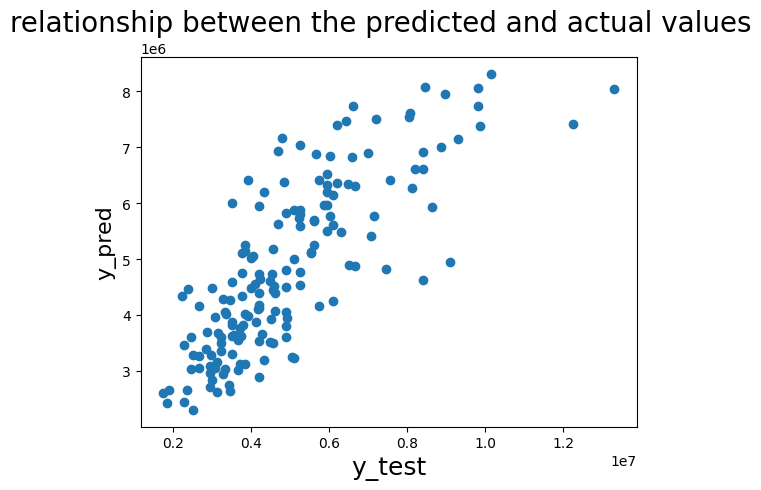

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('relationship between the predicted and actual values', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)